In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from IPython.display import clear_output

plt.rcParams.update({'font.size': 18})

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>
source: @allison_horst https://github.com/allisonhorst/penguins

# Загрузка данных

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.dropna(inplace=True)

# Визуализации

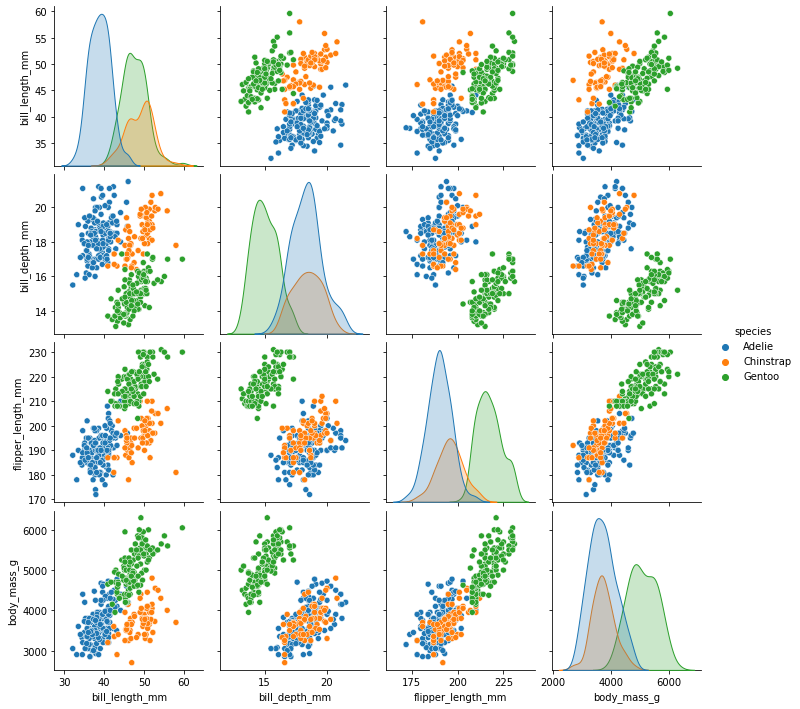

In [5]:
sns.pairplot(df, hue="species")

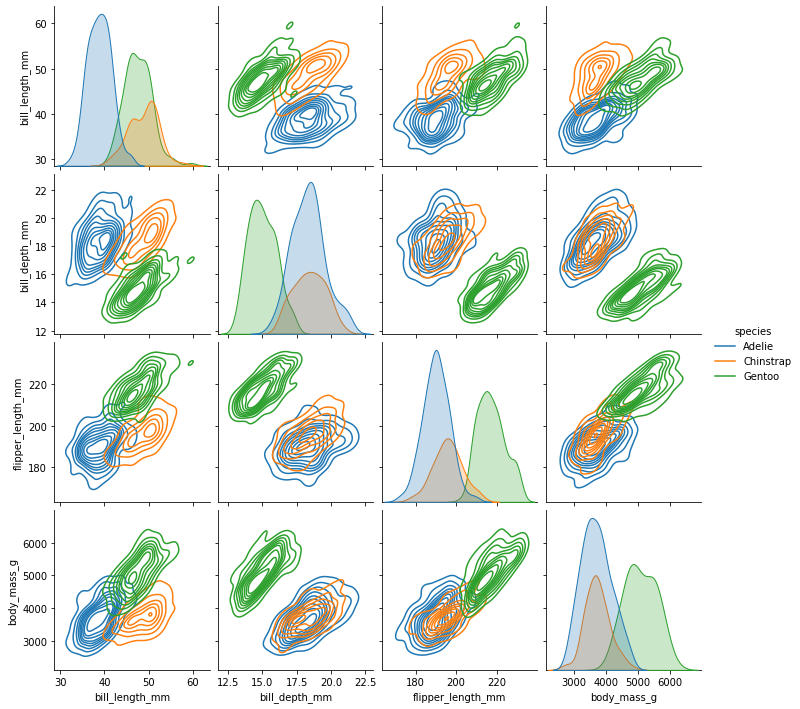

In [6]:
sns.pairplot(df, hue="species", kind="kde")

In [7]:
new_df = df[['flipper_length_mm', 'body_mass_g']]
new_df

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0
...,...,...
338,214.0,4925.0
340,215.0,4850.0
341,222.0,5750.0
342,212.0,5200.0


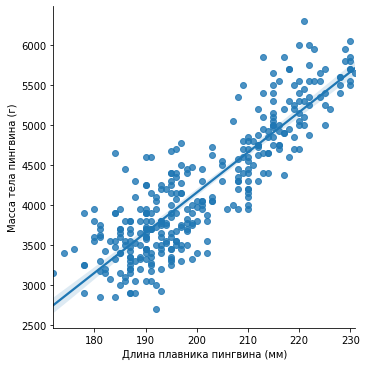

In [8]:
g = sns.lmplot(data=new_df, x="flipper_length_mm", y="body_mass_g",height=5)
g.set_axis_labels("Длина плавника пингвина (мм)", "Масса тела пингвина (г)")

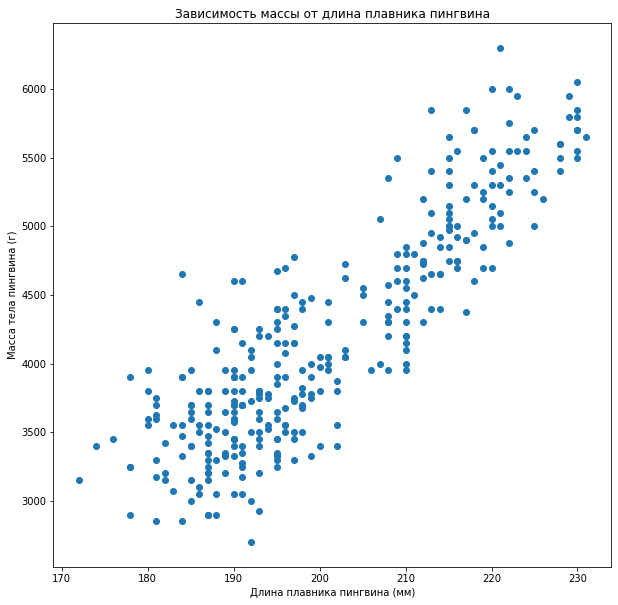

In [9]:
plt.figure(figsize=(10, 10))
plt.title('Зависимость массы от длина плавника пингвина')
plt.xlabel('Длина плавника пингвина (мм)')
plt.ylabel('Масса тела пингвина (г)')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])

In [10]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)
    plt.show()

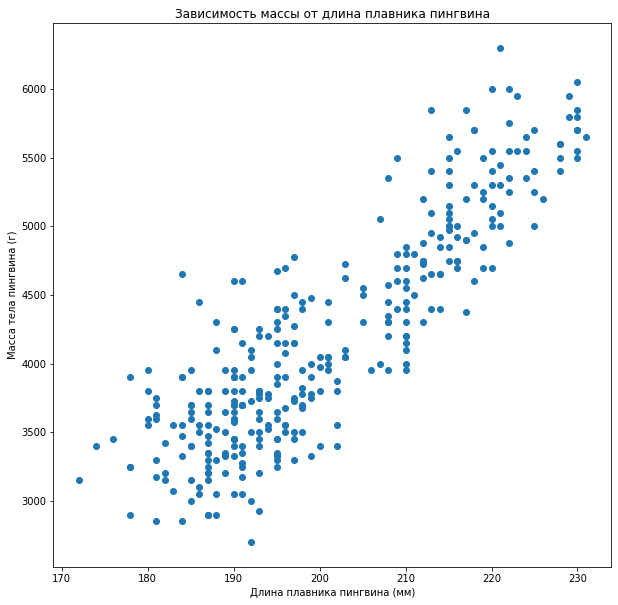

In [11]:
plot_line_on_data(df['flipper_length_mm'], df['body_mass_g'], 'Длина плавника пингвина (мм)', 'Масса тела пингвина (г)', 'Зависимость массы от длина плавника пингвина')

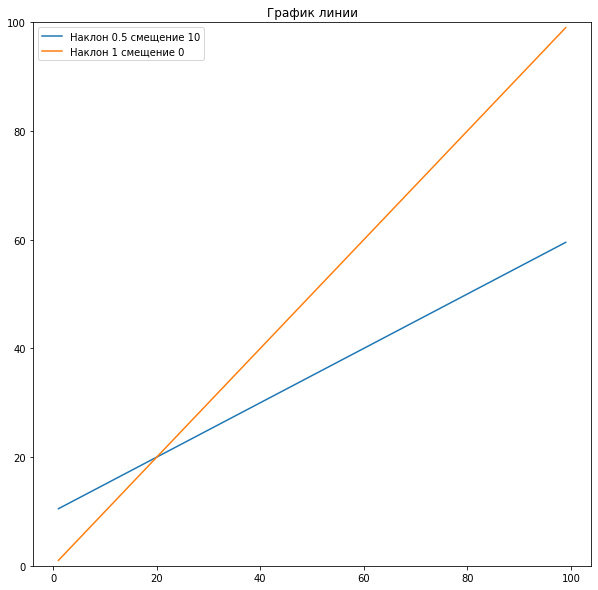

In [12]:
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

a = 0.5 # наклон
b = 10 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

a = 1 # наклон
b = 0 # смещение
x = np.arange(1, 100) # данные на вход
y = b + x*a # поэлементно умножаем на наклон и поэлементно добавляем смещение
plt.plot(x, y, label = f'Наклон {a} смещение {b}')

plt.legend()

Уравнение линии определяют 2 параметра, смещение и наклон. Мы определяем их как $a$ и $b$, но чаще их можно увидеть как $w_1$ и $w_0$.

Т.е. вместо $y = ax +b$ будет запись $y = w_0 + w_1 x$

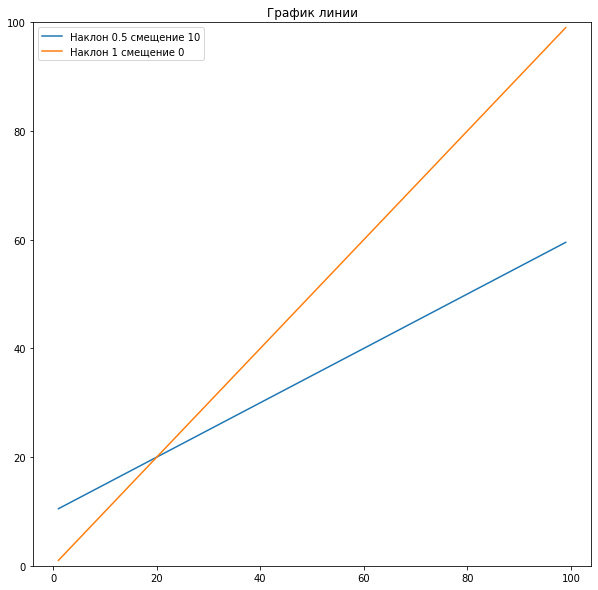

In [13]:
# все тот же код, только название переменных поменялись
plt.figure(figsize=(10, 10))
plt.title('График линии')
plt.ylim((0, 100))

w1 = 0.5 # наклон
w0 = 10 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

w1 = 1 # наклон
w0 = 0 # смещение

x = np.arange(1, 100) # данные на вход
y = w0 + w1*x # поэлементно умножаем на наклон и поэлементно добавляем смещение (прогноз)
plt.plot(x, y, label = f'Наклон {w1} смещение {w0}')

plt.legend()

Почему обозначение через $w$? Так проще задавать **веса** (параметры) нашей модели вне зависимости от количества входов.

Так в случае одного признака $[w_0, w_1]$ задаем $y = w_0 + w_1\cdot x$

В случае двух признаков $[w_0, w_1, w_2]$ - все аналогично, свободный член смещения и цифра, на которую мы домножаем каждую точку этого признака: $y = w_0 + w_1\cdot x_1 + w_2\cdot x_2$

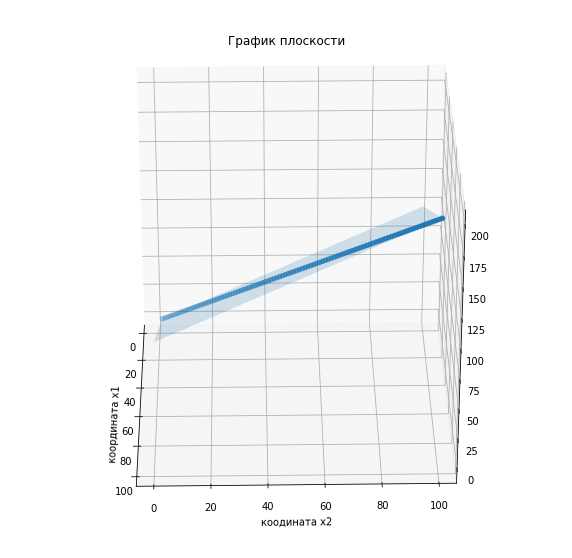

In [14]:
w1 = 1 # наклон вдоль x1
w2 = 1 # наклон вдоль x2
w0 = 0 # смещение

x1 = np.arange(1, 100) # данные на вход по первому признаку
x2 = np.arange(1, 100) # данные на вход по второму признаку

y = w0 + w1*x + w2*x # поэлементно умножаем на наклон каждый признак и поэлементно добавляем смещение (прогноз)


# это функции, которые создают координатную сетку
# это нужно только для красоты, чтоб нарисовать плоскость поверх точек
ww1, ww2 = np.meshgrid(x1, x2)
yy = w0 + ww1 + ww2

for angle in range(0,360): 
    ax = plt.figure(figsize=(10, 10)).gca(projection='3d')
    plt.title('График плоскости')
    plt.xlabel('координата х1')
    plt.ylabel('коодината х2')

    ax.plot_surface(ww1, ww2, yy, alpha=0.2)
    
    ax.scatter(x1, x2, y)
    ax.view_init(30, angle)
    plt.show()
    clear_output(wait=True)

Теперь построим линию поверх данных о пингвинах. Переопределим нашу старую функцию, визуализирующую только данные и добавим возможность строить $w_0 + w_1\cdot x$.

Для удобства будем подавать $w_0, w_1$ в виде списка (вектора) $[w_0, w_1]$

In [15]:
def plot_line_on_data(data_x, data_y, label_x, label_y, title, W):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.scatter(data_x, data_y)

    x = np.arange(min(data_x), max(data_x)) # данные для отрисовки линии
    y = W[0] + W[1]*x # поэлементно умножаем на наклон и поэлементно добавляем смещение
    plt.plot(x, y, label = f'Наклон {W[1]} смещение {W[0]}')
    plt.legend()
    plt.show()

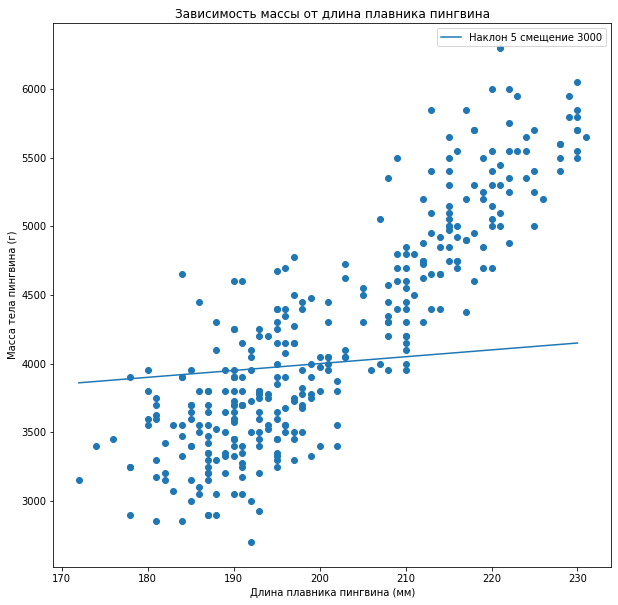

In [16]:
plot_line_on_data(df['flipper_length_mm'],
                  df['body_mass_g'],
                  'Длина плавника пингвина (мм)',
                  'Масса тела пингвина (г)',
                  'Зависимость массы от длина плавника пингвина',
                  [3000, 5]) # коэффициенты наклона я прикинул на глаз, наша задача - найти их

# реальная задача 

В этой части мы будем работать с датасетом цен на дома в Мельбурне: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [17]:
!gdown --id 1auxfozJgbG4-dmYxto9wSvKeZ01SyD1y
!gdown --id 1M_YvMJQSLzIskH7iCtiuHO-TLYPqB_Kr

Downloading...
From: https://drive.google.com/uc?id=1auxfozJgbG4-dmYxto9wSvKeZ01SyD1y
To: /content/test.csv
100% 451k/451k [00:00<00:00, 3.63MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M_YvMJQSLzIskH7iCtiuHO-TLYPqB_Kr
To: /content/train.csv
100% 461k/461k [00:00<00:00, 3.15MB/s]


In [18]:
data = pd.read_csv("train.csv")


In [19]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Загрузка данных

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [21]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
answer = data['SalePrice']
data = data.drop(columns=['SalePrice'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

df train имеет 81 колонку (79 признаков + id и целевую переменную SalePrice) и 1460 объектов (число строк или заключенных сделок)
df test имеет 80 колонок (79 признаков + id) и 1459 объектов
Мы имеем много информации, которая, вероятно, связана с SalePrice, например, о районе, состоянии и качестве дома. Возможно, некоторые признаки не так важны для прогнозирования таргета, также возможна сильная корреляция между самими признаками (например, GarageCars и GarageArea). Для некоторых столбцов отсутствуют многие значения: только 7 значений для Pool QC в train_df и 3 в test_df

##  Деление выборки на train и test

В этом датасете заранее выборка не поделена на train и test. Нужно сделать это самим.

Никогда нельзя осуществлять предобработку данных на всем датасете до деления его на трейн и тест. Это нужно, чтобы избежать любого, даже косвенного использования информации из трейна в тестовом датасете.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=0.2) # test_size — какая доля данных пойдет в тестовую выборку

Зачем вообще нужен train_test_split: почему нельзя просто разбить выборку на X_train и X_test, взяв 80% первых строк из data в X_train, а остальные оставить на X_test?

Ответ такой: train_test_split делит выборку так, чтобы по каждому признаку и целевой переменной распределения тренировочной части и тестовой части были одинаковы. Чтобы обучающая выборка была "такая же", как тестовая: содержала ту же долю мужчин/женщин и т.п.

Давайте убедимся, что train_test_split делит выборку на train и test так, чтобы распределения были одинаковы: построим гистограммы признаков.

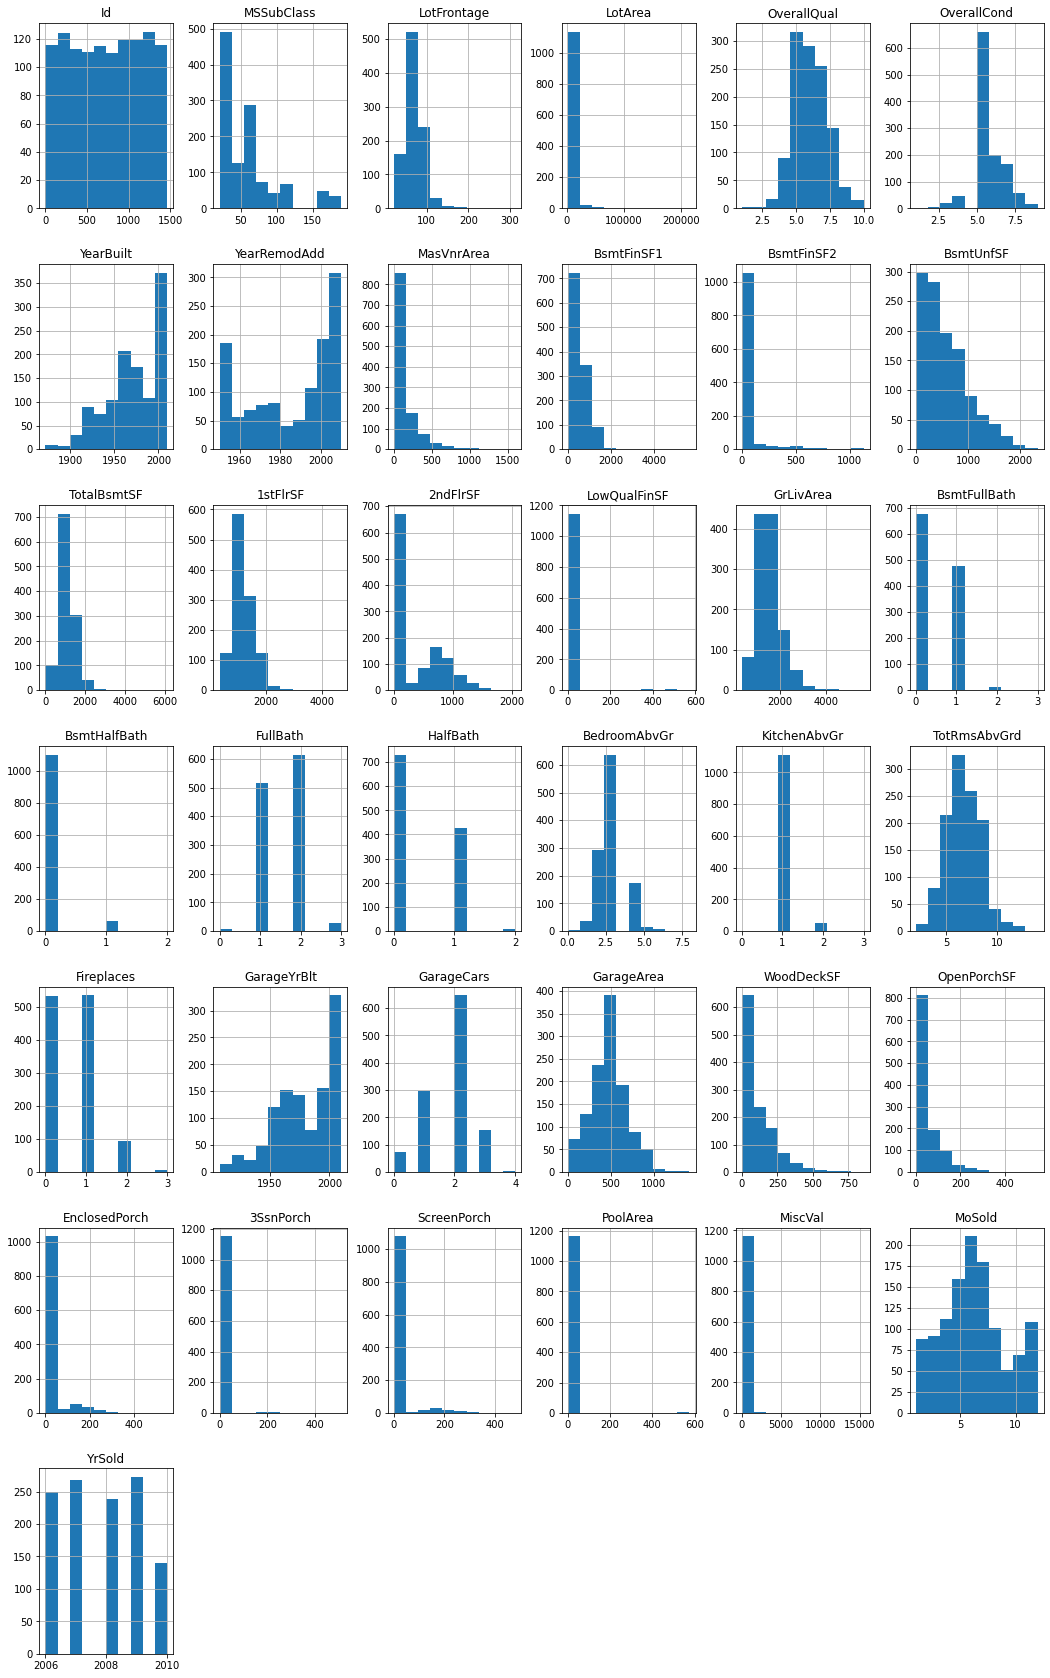

In [26]:
X_train.hist(figsize=(18, 30));

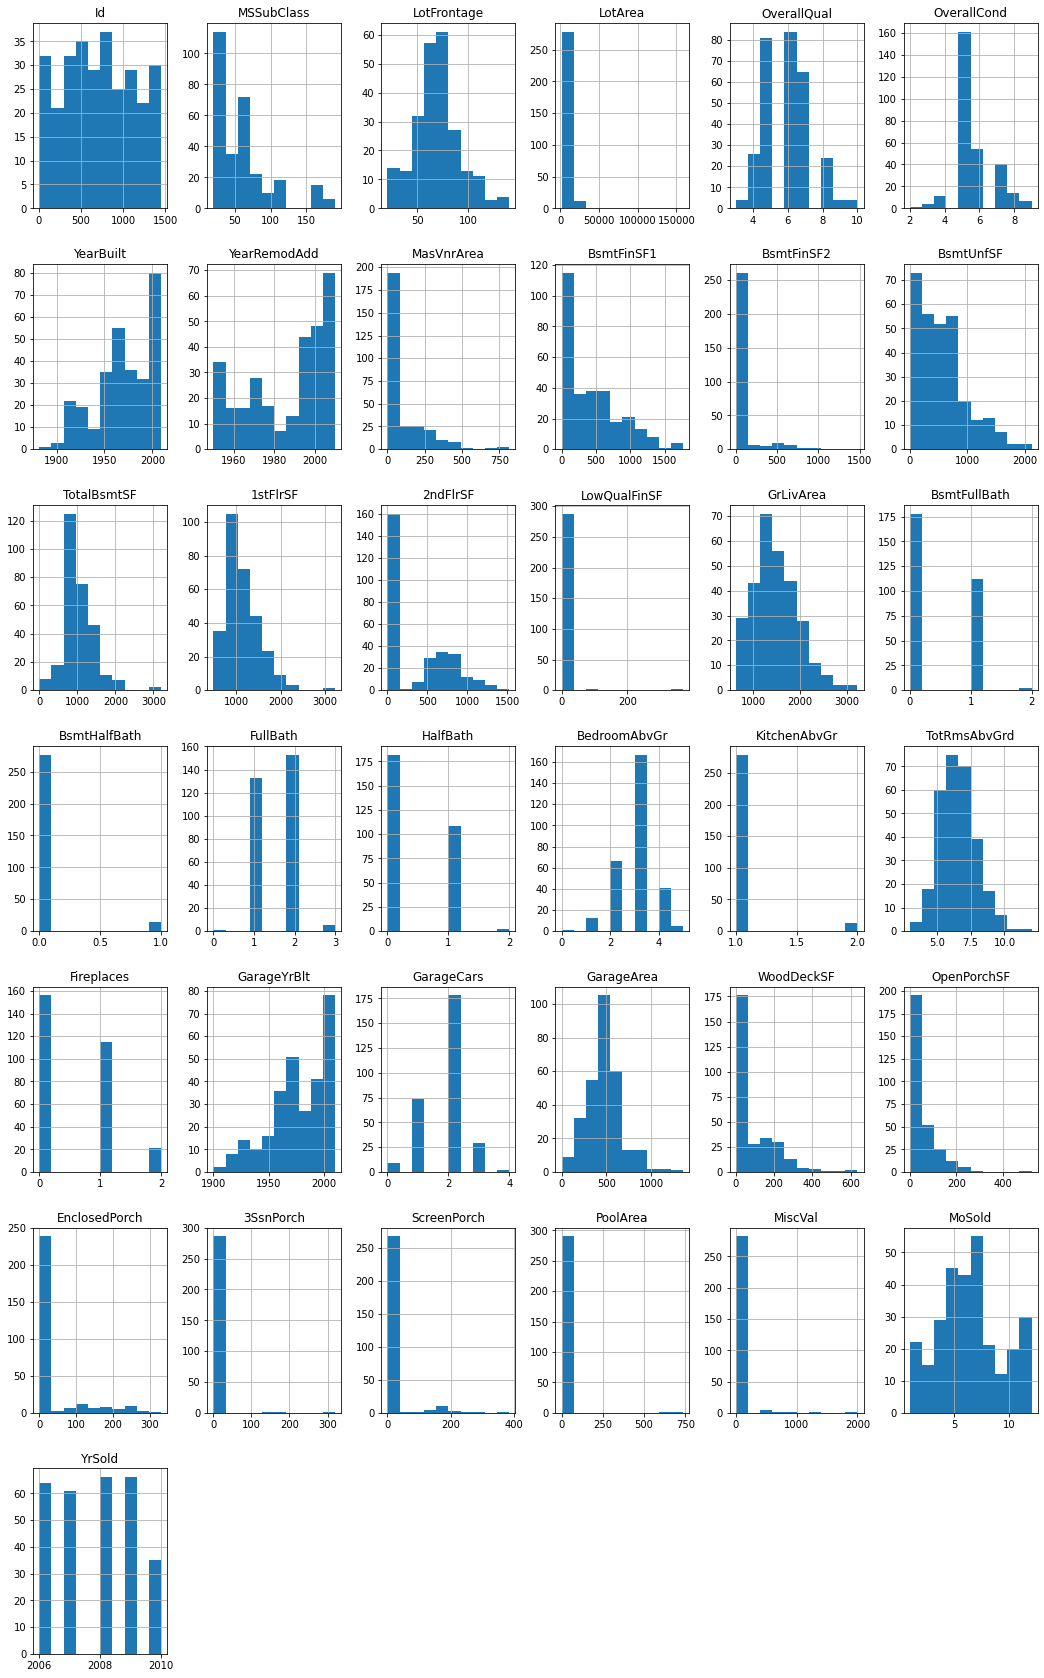

In [27]:
X_test.hist(figsize=(18, 30));

Далее предобрабатывать мы будем только тренировочные данные (X_train). После того, как предобработаем X_train и обучим модели, предобработаем и X_test.

Нельзя исследовать предобработку данных сразу на X_train и X_test, во избежание использования любой, даже косвенной информации из X_test во время решения, как предобработать X_train.

## Предобработка признаков:

### Работа с пропусками

Прежде чем обучать сеть и обрабатывать признаки, нужно заполнить пропуски в столбцах. Никакой (почти) алгоритм машинного обучения не умеет работать с данными с пропусками. 

Посмотрим, в каких столбцах есть пропуски:

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 954 to 346
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    966 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          68 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overall

# числовые и категориальные признаки

In [29]:
numerical_feats = X_train.dtypes[X_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = X_train.dtypes[X_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [30]:
print(X_train[numerical_feats].columns)
print("*"*100)
print(X_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Bs

# список признаков с пропусками

In [31]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1163,0.995719
MiscFeature,1124,0.962329
Alley,1100,0.941781
Fence,947,0.810788
FireplaceQu,534,0.457192
LotFrontage,202,0.172945
GarageCond,72,0.061644
GarageType,72,0.061644
GarageYrBlt,72,0.061644
GarageFinish,72,0.061644


**Заполнение пропусков**  
Для некоторых признаков мы наблюдаем большое число пропусков.  
Тем не менне, чтение описания данных позволяет нам заполнить некоторые пропуски:  
для PoolQC, NaN это не пропущенное значение, а отсутвие бассейна. 

In [32]:
# Список признаков NaN в которых имеет какое-то значение
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# Заменим NaN на None
for col in cols_fillna:
    X_train[col].fillna('None',inplace=True)
    X_test[col].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [33]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,202,0.172945
GarageYrBlt,72,0.061644
MasVnrArea,5,0.004281
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
ExterQual,0,0.000000


In [34]:
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,57,0.195205
GarageYrBlt,9,0.030822
MasVnrArea,3,0.010274
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
ExterQual,0,0.000000


In [35]:
# В остальных данных заполним пропуски средним
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


#  Зависимость таргета (SalePrice) от признаков

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

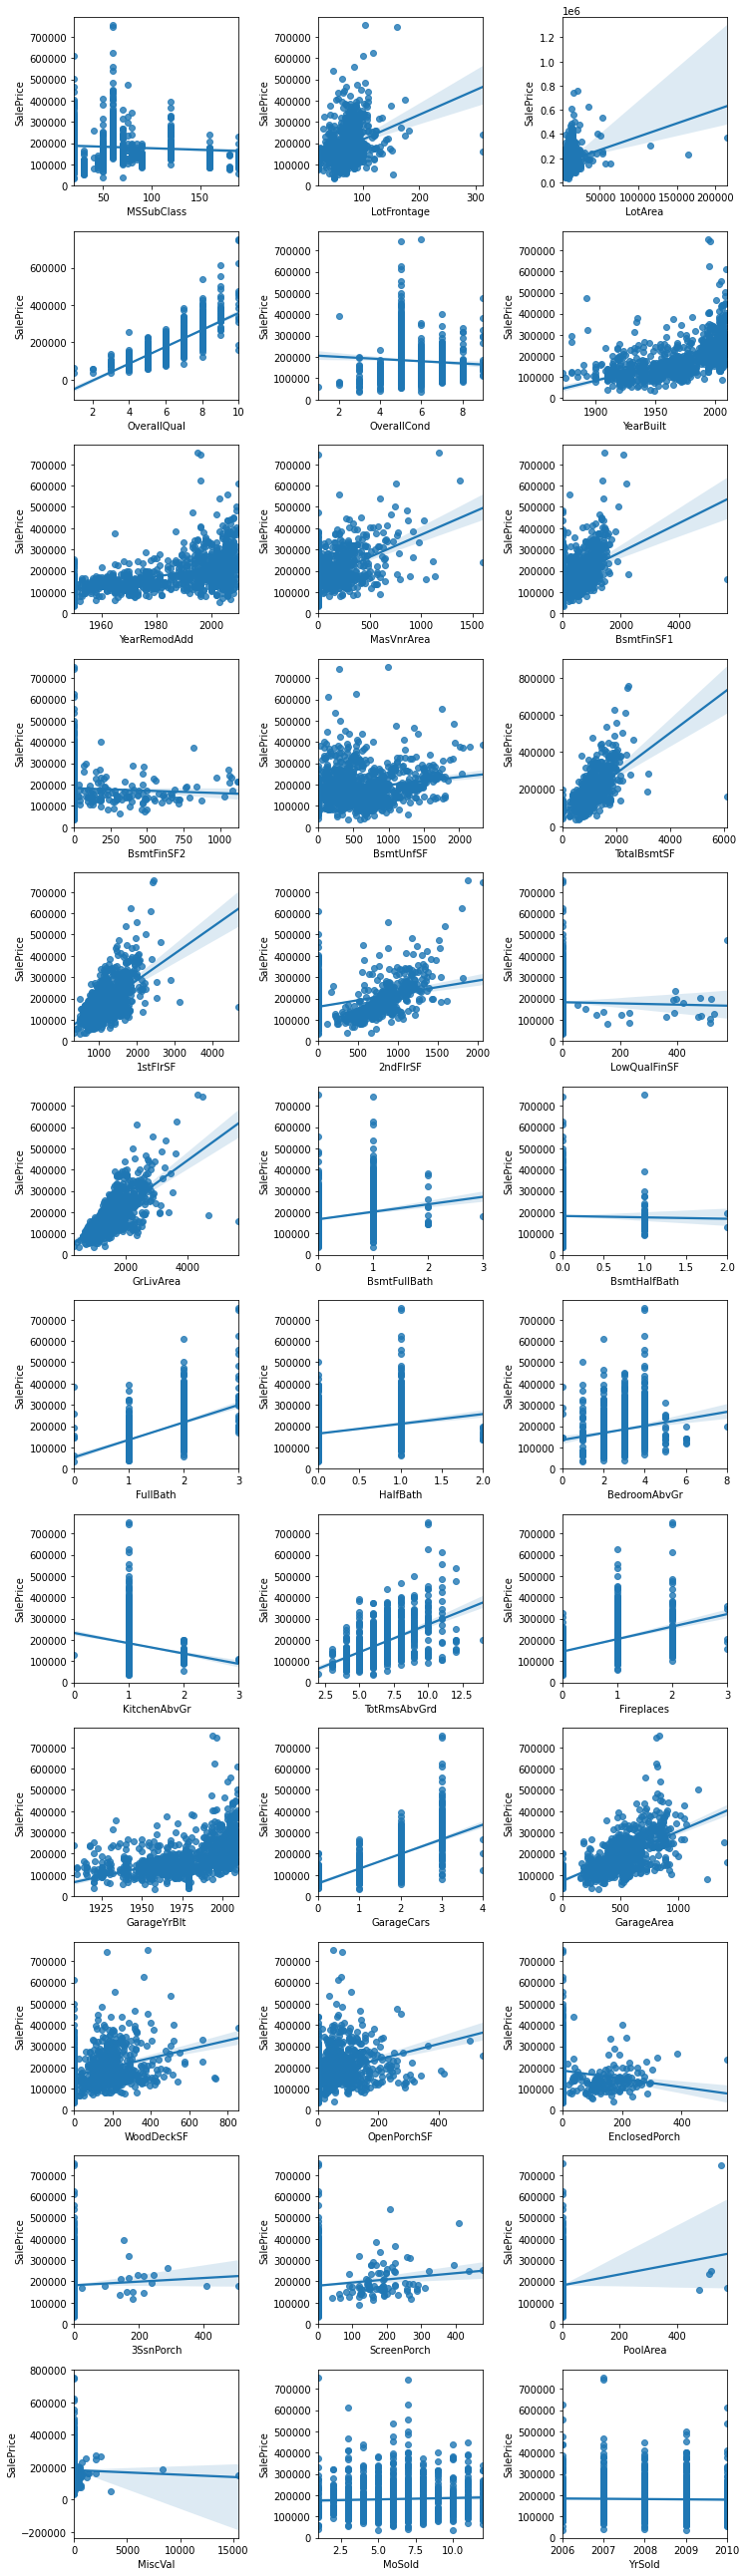

In [36]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(X_train[li_plot_num_feats[i]], y_train, ax = axs[r][c])
            
            
plt.tight_layout()    
plt.show()   

**Выводы по EDA числовых столбцов:**

Мы наблюдаем что для некоторых столбцов ("OverallQual"), существует сильная линейная корреляция с целевой переменной, а для других ("MSSubClass") оня очень слабая. В этом ноутбуке мы решили использовать для прогноза только признаки с сильной корреляцией (большей чем порог). Вот список признаков, которые мы уберем: 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

In [37]:
df_concat = pd.concat([X_train , y_train] , axis =1)

In [38]:
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.000000,9400,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,...,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,None,None,1979.05292,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,10,2006,WD,AdjLand,127500
1070,1071,20,RL,72.000000,10152,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,1956,Hip,CompShg,MetalSd,MetalSd,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,BLQ,586,Unf,0,462,1048,GasA,...,Y,SBrkr,1048,0,0,1048,1,0,1,0,3,1,TA,6,Typ,0,None,Attchd,1956.00000,Unf,1,286,TA,TA,Y,0,20,0,0,192,0,None,None,None,0,6,2007,WD,Normal,135000
887,888,50,RL,59.000000,16466,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,...,Y,SBrkr,872,521,0,1393,0,0,1,1,3,1,TA,8,Typ,0,None,Attchd,1955.00000,Unf,1,300,TA,TA,Y,121,0,0,0,265,0,None,None,None,0,4,2008,WD,Normal,135500
386,387,50,RL,58.000000,8410,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Edwards,Feedr,Norm,1Fam,1.5Fin,5,3,1910,1996,Gambrel,CompShg,Wd Sdng,VinylSd,None,0.0,TA,Fa,PConc,TA,TA,No,Unf,0,Unf,0,658,658,GasA,...,Y,SBrkr,658,526,0,1184,0,0,1,0,5,1,TA,8,Typ,0,None,None,1979.05292,None,0,0,None,None,N,0,151,0,0,0,0,None,None,None,0,5,2006,WD,AdjLand,81000
1146,1147,20,RL,70.365424,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1985,1985,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,85.0,Gd,TA,CBlock,Gd,TA,No,GLQ,1258,Unf,0,40,1298,GasA,...,Y,SBrkr,1298,0,0,1298,1,0,2,0,3,1,Gd,5,Typ,1,TA,Attchd,1985.00000,Unf,2,403,TA,TA,Y,165,26,0,0,0,0,None,None,None,0,5,2006,WD,Normal,180000


In [39]:
corr = df_concat.corr()
corr_abs = corr.abs()

min_val_corr = 0.4

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice')['SalePrice']

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

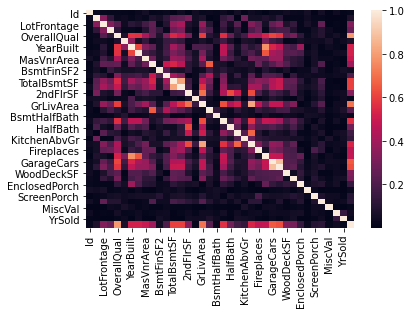

In [40]:
_=sns.heatmap(corr_abs)

# Список числовых признаков и их корреляций с целевой переменной

In [41]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)

SalePrice        1.000000
OverallQual      0.792009
GrLivArea        0.709514
GarageCars       0.653553
GarageArea       0.631182
TotalBsmtSF      0.602225
1stFlrSF         0.601053
FullBath         0.565762
TotRmsAbvGrd     0.532813
YearBuilt        0.522647
YearRemodAdd     0.520064
MasVnrArea       0.492587
GarageYrBlt      0.478597
Fireplaces       0.472701
BsmtFinSF1       0.392662
2ndFlrSF         0.339334
WoodDeckSF       0.327824
LotFrontage      0.324725
OpenPorchSF      0.300679
HalfBath         0.287602
LotArea          0.270179
BsmtFullBath     0.228438
BsmtUnfSF        0.206226
BedroomAbvGr     0.169181
EnclosedPorch    0.143260
KitchenAbvGr     0.134472
PoolArea         0.110091
ScreenPorch      0.100574
MSSubClass       0.075982
OverallCond      0.071475
BsmtFinSF2       0.044324
MoSold           0.043724
3SsnPorch        0.030500
YrSold           0.021945
BsmtHalfBath     0.019821
MiscVal          0.019333
LowQualFinSF     0.018624
Name: SalePrice, dtype: float64
******

# Список категориальных признаков и их уникальные значения

In [42]:
for catg in list(categorical_feats) :
    print(X_train[catg].value_counts())
    print('#'*50)

RL         931
RM         169
FV          48
RH          12
C (all)      8
Name: MSZoning, dtype: int64
##################################################
Pave    1162
Grvl       6
Name: Street, dtype: int64
##################################################
None    1100
Grvl      37
Pave      31
Name: Alley, dtype: int64
##################################################
Reg    736
IR1    388
IR2     34
IR3     10
Name: LotShape, dtype: int64
##################################################
Lvl    1040
Bnk      55
HLS      44
Low      29
Name: LandContour, dtype: int64
##################################################
AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     851
Corner     209
CulDSac     67
FR2         39
FR3          2
Name: LotConfig, dtype: int64
##################################################
Gtl    1101
Mod      56
Sev      11
Name: LandSlope, dtype: int64
#####################################

# Зависимость категориальных признаков и таргета

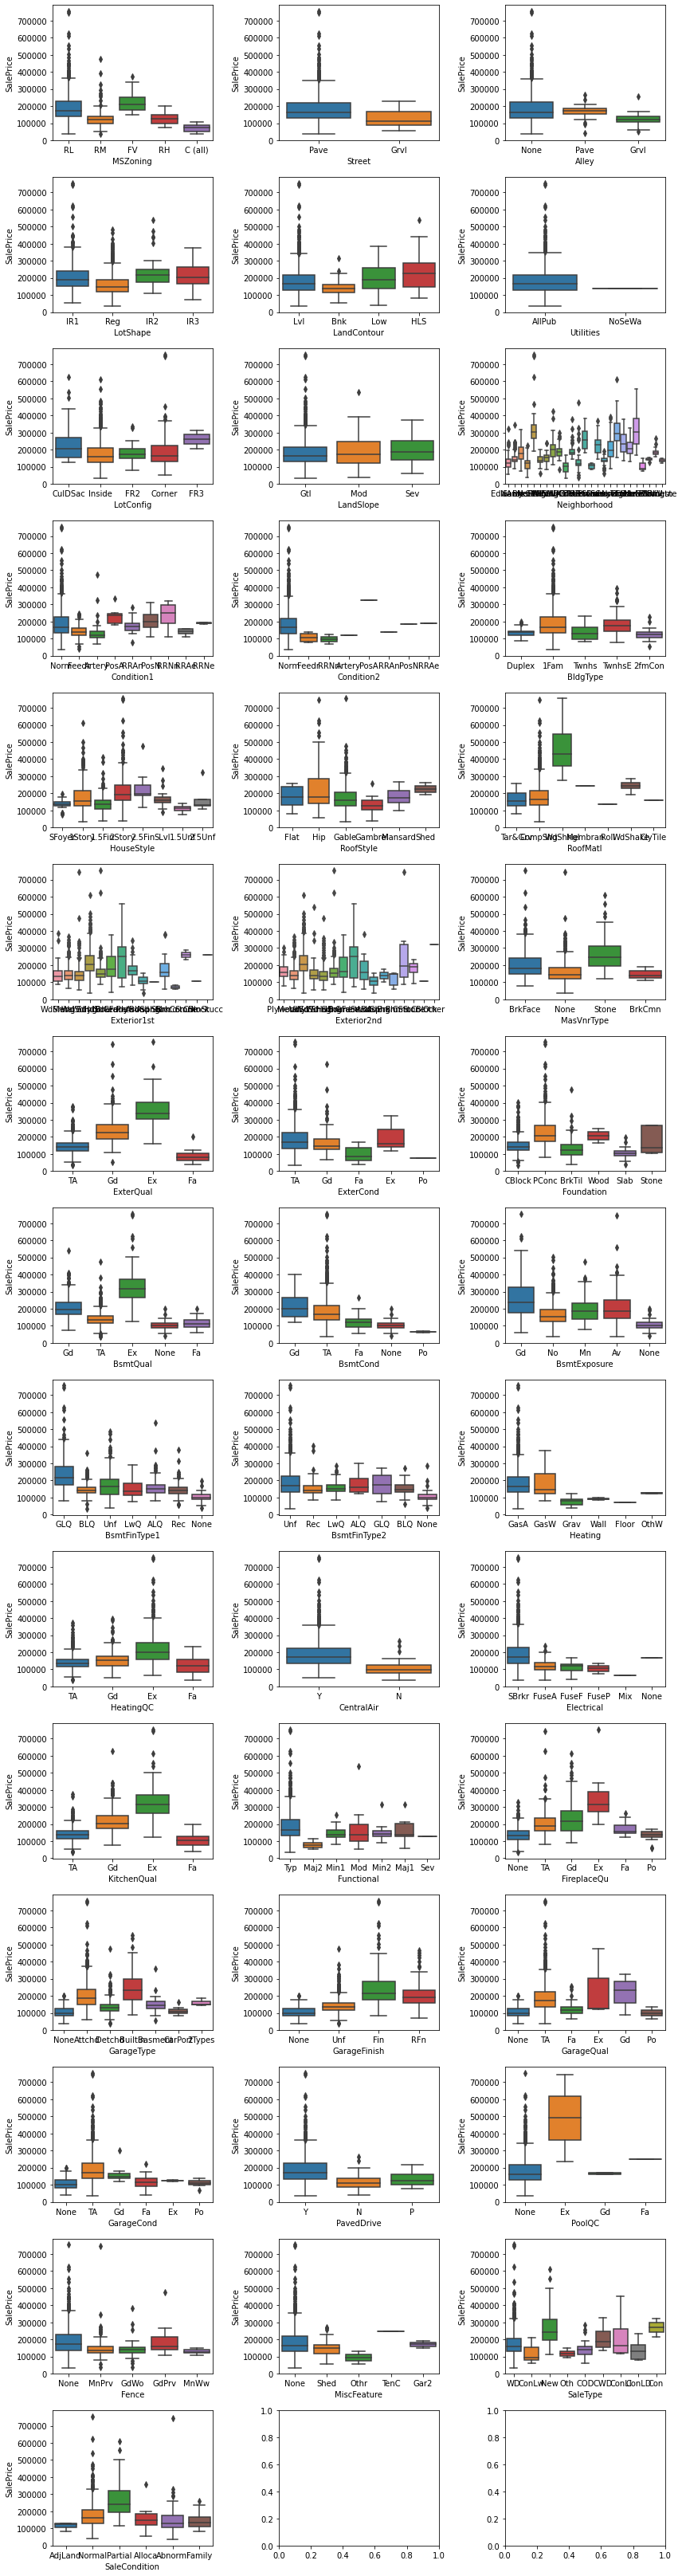

In [43]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice', data=df_concat, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

**Выводы по EDA категориальных столбцов:**

Для многих категриальных признаков нет сильной корреляции с целевой переменной.
Однако для некоторых легко найти сильную связь.
На рисунках выше это: 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'

Также для категориальных признаков используем только те, которые сильно связаны с SalePrice.

Таким образом, другие столбцы удаляются при обучении моделей машинного обучения в Части 2: 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'

In [44]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [46]:
#Удаление столбцов со слабой корреляцией

id_test = X_train['Id']

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [X_train, X_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


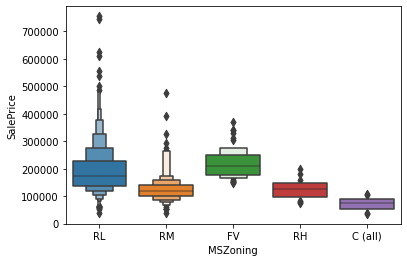

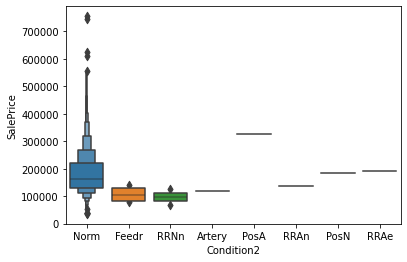

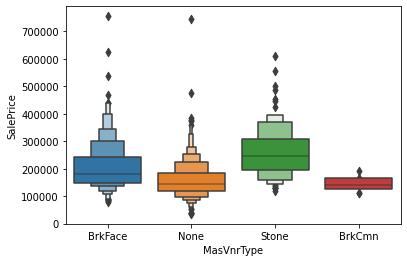

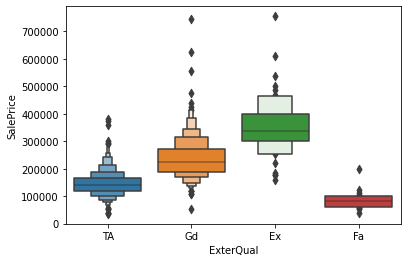

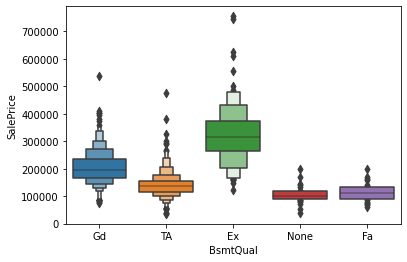

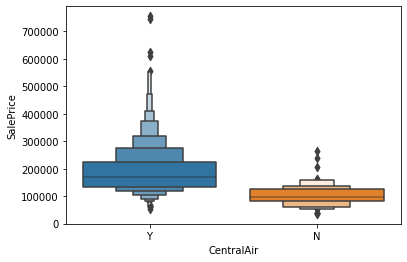

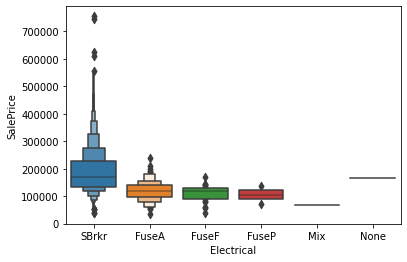

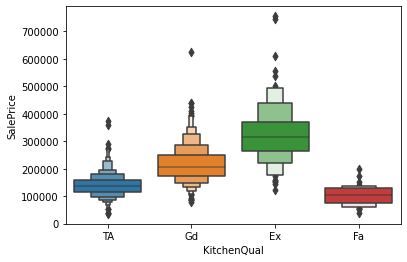

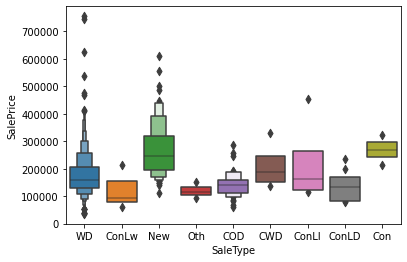

In [47]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')
target = 'SalePrice'
for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_concat, kind='boxen')
    #sns.violinplot(x=catg, y=target, data=df_concat)
   
    sns.boxenplot(x=catg, y=target, data=df_concat)
    #bp = df_concat.boxplot(column=[target], by=catg)
    
    plt.show()

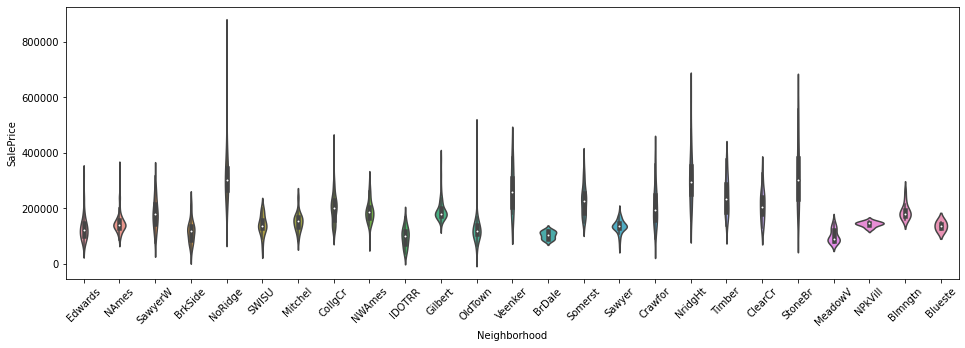

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_concat, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [49]:
for catg in catg_list :
    g = df_concat.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)     72060.000000
FV         219616.541667
RH         127327.833333
RL         191729.891515
RM         127565.668639
Name: SalePrice, dtype: float64
Condition2
Artery    118000.0000
Feedr     107875.0000
Norm      182476.6465
PosA      325000.0000
PosN      184750.0000
RRAe      190000.0000
RRAn      136905.0000
RRNn       96750.0000
Name: SalePrice, dtype: float64
MasVnrType
BrkCmn     144144.444444
BrkFace    207501.579387
None       156510.780523
Stone      261029.919643
Name: SalePrice, dtype: float64
ExterQual
Ex    356684.047619
Fa     87985.214286
Gd    235674.842239
TA    144467.870654
Name: SalePrice, dtype: float64
BsmtQual
Ex      324612.702970
Fa      113735.185185
Gd      204589.582834
None    105505.233333
TA      139850.420432
Name: SalePrice, dtype: float64
CentralAir
N    104769.455696
Y    187721.164371
Name: SalePrice, dtype: float64
Electrical
FuseA    120847.012346
FuseF    109692.590909
FuseP    105000.000000
Mix       67000.000000
None     167500

### Категориальные признаки

Сначала предобработаем категориальные признаки. Посмотрим, какие столбцы датасета — категориальные.

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 954 to 346
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1168 non-null   object 
 1   Neighborhood  1168 non-null   object 
 2   Condition2    1168 non-null   object 
 3   OverallQual   1168 non-null   int64  
 4   YearBuilt     1168 non-null   int64  
 5   YearRemodAdd  1168 non-null   int64  
 6   MasVnrType    1168 non-null   object 
 7   MasVnrArea    1168 non-null   float64
 8   ExterQual     1168 non-null   object 
 9   BsmtQual      1168 non-null   object 
 10  TotalBsmtSF   1168 non-null   int64  
 11  CentralAir    1168 non-null   object 
 12  Electrical    1168 non-null   object 
 13  1stFlrSF      1168 non-null   int64  
 14  GrLivArea     1168 non-null   int64  
 15  FullBath      1168 non-null   int64  
 16  KitchenQual   1168 non-null   object 
 17  TotRmsAbvGrd  1168 non-null   int64  
 18  Fireplaces    1168 non-null

Категориальные — те признаки, у которых Dtype=object. На самом деле, и в числовых признаках могут скрываться категориальные, но об этом мы поговорим позже. Первичная задача — предобработать признаки, у которых Dtype=object.

#### 1 способ: замена значений в столбце на числа

Занумеровать уникальные значения в столбце и заменить каждое значение на его номер. 

Пример: в столбце Neighborhood есть значения:

oldtown  $\ \ \ \ \ \ \ \ $        1         
StoneBR    $\ \ \ \ \ \ \ $      2 \\
...

Занумеровать значения в столбце можно двумя спосбами. 

1 способ: Руками:

In [51]:
from collections import defaultdict
# создаем словарь {'Reservoir' : 1, 'Richmond' : 2, ...}
dict_ = defaultdict(int)
for i, x in enumerate(np.unique(X_train.Neighborhood  )):
    dict_[x] = i+1

In [52]:
# к каждому значению в колонке Suburb применяем функцию, которая ставит этому значению в соответствие число из dict_
# про lambda-функции подробнее можно узнать тут: https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python
X_train['Neighborhood'] = X_train['Neighborhood'].apply(lambda x: dict_[x])
X_test['Neighborhood'] = X_test['Neighborhood'].apply(lambda x: dict_[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Проверим, что получилось:

In [53]:
X_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
954,RL,8,Norm,6,1975,1975,BrkFace,250.0,TA,Gd,945,Y,SBrkr,980,980,2,TA,4,0,1979.05292,0,0,WD
1070,RL,13,Norm,5,1956,1956,BrkFace,120.0,TA,TA,1048,Y,SBrkr,1048,1048,1,TA,6,0,1956.00000,1,286,WD
887,RL,8,Norm,5,1955,1955,None,0.0,TA,TA,816,Y,SBrkr,872,1393,1,TA,8,0,1955.00000,1,300,WD
386,RL,8,Norm,5,1910,1996,None,0.0,TA,TA,658,Y,SBrkr,658,1184,1,TA,8,0,1979.05292,0,0,WD
1146,RL,21,Norm,6,1985,1985,BrkFace,85.0,Gd,Gd,1298,Y,SBrkr,1298,1298,2,Gd,5,1,1985.00000,2,403,WD


Видим, что колонка Neighborhood стала числовой, как и ожидалось.

**2 способ**, как можно перевести все значения в столбце в числа: использовать LabelEncoder из Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Так как колонку Neighborhood мы перевели в числа выше, давайте LabelEncoder применим к другому категориальному признаку: KitchenQual

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
# заводим LabelEncoder. Его же вы будете использовать для предобработки признака Method в тестовых данных
le = LabelEncoder()
# передаем le в fit нашу колонку, чтобы LabelEncoder занумеровал значения в ней
le.fit(X_train['KitchenQual'])

LabelEncoder()

Посмотрим, какие уникальные значения в колонках нашел LabelEncoder:

In [56]:
le.classes_

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

LabelEncoder занумеровал значения ровно в том порядке, в котором мы видим их выше. Вместо @Ex будет 0, вместо Fa — 1 и т.д.

Переведем теперь с помощью le нашу колонку SellerG в числа:

In [57]:
X_train['KitchenQual'] = le.transform(X_train['KitchenQual'])
X_test['KitchenQual'] = le.transform(X_test['KitchenQual'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


И посмотрим, что получилось:

In [58]:
X_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
954,RL,8,Norm,6,1975,1975,BrkFace,250.0,TA,Gd,945,Y,SBrkr,980,980,2,3,4,0,1979.05292,0,0,WD
1070,RL,13,Norm,5,1956,1956,BrkFace,120.0,TA,TA,1048,Y,SBrkr,1048,1048,1,3,6,0,1956.00000,1,286,WD
887,RL,8,Norm,5,1955,1955,None,0.0,TA,TA,816,Y,SBrkr,872,1393,1,3,8,0,1955.00000,1,300,WD
386,RL,8,Norm,5,1910,1996,None,0.0,TA,TA,658,Y,SBrkr,658,1184,1,3,8,0,1979.05292,0,0,WD
1146,RL,21,Norm,6,1985,1985,BrkFace,85.0,Gd,Gd,1298,Y,SBrkr,1298,1298,2,2,5,1,1985.00000,2,403,WD


In [59]:
X_test.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType
446,RL,13,Norm,6,1966,2002,None,0.0,Gd,TA,1517,Y,SBrkr,1888,1888,2,2,6,1,1966.0,2,578,WD
579,RM,18,Norm,5,1954,1954,BrkFace,335.0,TA,TA,1050,N,FuseF,1050,1795,2,3,7,0,1954.0,1,352,WD
983,RL,6,Norm,8,2002,2002,None,0.0,Gd,Gd,1128,Y,SBrkr,1149,2290,2,2,9,1,2002.0,2,779,WD
676,RM,18,Norm,4,1900,1950,None,0.0,TA,TA,1095,N,SBrkr,1095,1774,2,3,8,0,1920.0,3,779,WD
1410,RL,6,Norm,7,2001,2001,None,0.0,Gd,Gd,944,Y,SBrkr,944,1840,2,2,6,0,2001.0,2,622,WD


Видим, что колонка KitchenQual теперь тоже числовая.

#### 2 способ: бинаризация

Второй способ обработать категориальные признаки — бинаризация. При бинаризации из одного столбца с несколькими категориальными значениями получается несколько новых бинарных столбцов, значения в которых — 0 и 1.

Пример: Пусть у нас в данных есть категориальный признак Education, и в нем три уникальных значения — 'high school', 'university' и 'PhD'. При бинаризации вместо колонки Education появится три новые колонки: Education_high_school, Education_university и Education_phd. В колонке Education_high_school будут единицы в тех строках, в которых в колонке Education было значение 'high school', а в остальных строках будут 0. Аналогично для двух других колонок.

Бинаризовать колонки можно с помощью метода get_dummies библиотеки pandas: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Давайте бинаризуем колонку MSZoning. Вот что получится из одной колонки после бинаризации. Получится 5 новых колонок, т.к. в Regionname было 5 уникальных значений.

In [60]:
pd.get_dummies(X_train['MSZoning'])

,C (all),FV,RH,RL,RM
954,0,0,0,1,0
1070,0,0,0,1,0
887,0,0,0,1,0
386,0,0,0,1,0
1146,0,0,0,1,0
...,...,...,...,...,...
732,0,0,0,1,0
1057,0,0,0,1,0
268,0,0,0,0,1
177,0,0,0,1,0


Чтобы заменить колонку MSZoning на эти 5 новых колонок в X_train, нужно передать get_dummies весть X_train и указать список колонок, которые нужно бинаризовать:

In [61]:
X_train = pd.get_dummies(X_train, columns=['MSZoning'])
X_test = pd.get_dummies(X_test, columns=['MSZoning'])

Посмотрим, что получилось:

In [62]:
X_train.head()

,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
954,8,Norm,6,1975,1975,BrkFace,250.0,TA,Gd,945,Y,SBrkr,980,980,2,3,4,0,1979.05292,0,0,WD,0,0,0,1,0
1070,13,Norm,5,1956,1956,BrkFace,120.0,TA,TA,1048,Y,SBrkr,1048,1048,1,3,6,0,1956.00000,1,286,WD,0,0,0,1,0
887,8,Norm,5,1955,1955,None,0.0,TA,TA,816,Y,SBrkr,872,1393,1,3,8,0,1955.00000,1,300,WD,0,0,0,1,0
386,8,Norm,5,1910,1996,None,0.0,TA,TA,658,Y,SBrkr,658,1184,1,3,8,0,1979.05292,0,0,WD,0,0,0,1,0
1146,21,Norm,6,1985,1985,BrkFace,85.0,Gd,Gd,1298,Y,SBrkr,1298,1298,2,2,5,1,1985.00000,2,403,WD,0,0,0,1,0


Видим, что колонка MSZoning исчезла, и появились новые 5 колонок. 

Применим тот же подход ко всем остальным колонкам

In [63]:
categorical_feats = X_train.dtypes[X_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  7


In [64]:
X_train_dum = pd.get_dummies(X_train, columns=categorical_feats)
X_test_dum = pd.get_dummies(X_test, columns=categorical_feats)

проблема в том, что get_dummies смотрит на каждый датасет по отдельности  

In [66]:
set(X_train_dum.columns) - set(X_test_dum.columns)

{'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_None',
 'ExterQual_Fa',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_Oth'}

In [67]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
one_hot_encoder = OneHotEncoder(  handle_unknown = 'ignore')

In [69]:
others_columns = list(X_train.columns) 
for i in categorical_feats:
    others_columns.remove(i)

In [72]:
columns_to_change = categorical_feats

In [73]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
points_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)

In [74]:
points_onehot = pd.DataFrame(points_onehot, index=X_train.index, columns=column_names)

In [75]:
# соединяем новую табличку с исходной
points_new = pd.concat([X_train, points_onehot], axis=1)

# удаляем исходные неизменные признаки
X_train_onehot = points_new.drop(columns=columns_to_change)

In [76]:
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
points_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

points_onehot = pd.DataFrame(points_onehot, index=X_test.index, columns=column_names)
# соединяем новую табличку с исходной
points_new = pd.concat([X_test, points_onehot], axis=1)

# удаляем исходные неизменные признаки
X_test_onehot = points_new.drop(columns=columns_to_change)

In [77]:
set(X_train_onehot.columns) - set(X_test_onehot.columns)

set()

In [78]:
 set(X_test_onehot.columns) - set(X_train_onehot.columns) 
    

set()

Отлично! Теперь можно обучать на этом датасете модели машинного обучения =)

# Стандартизация признаков 

In [79]:
X_test_onehot.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.0,292.0,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,292.0,292.000000,292.000000,292.0,292.0,292.000000,292.000000,292.000000,292.000000,292.0,292.000000
mean,13.037671,5.986301,1970.273973,1985.702055,85.427546,1028.770548,1127.537671,1473.972603,1.554795,2.383562,6.445205,0.537671,1976.470809,1.797945,474.287671,0.006849,0.058219,0.013699,0.753425,0.167808,0.003425,0.006849,0.986301,0.0,0.003425,0.0,0.0,0.0,0.020548,0.294521,0.630137,0.054795,0.034247,0.0,0.325342,0.640411,0.068493,0.027397,0.400685,0.023973,0.479452,0.054795,0.945205,0.044521,0.017123,0.003425,0.0,0.0,0.934932,0.030822,0.0,0.0,0.003425,0.003425,0.006849,0.078767,0.0,0.876712
std,6.006464,1.286922,29.466743,19.664460,141.140490,416.317268,383.279422,468.340082,0.537665,0.729923,1.508422,0.627507,25.378317,0.681314,198.835837,0.082618,0.234559,0.116436,0.431757,0.374337,0.058521,0.082618,0.116436,0.0,0.058521,0.0,0.0,0.0,0.142109,0.456609,0.483596,0.227969,0.182174,0.0,0.469307,0.480704,0.253024,0.163518,0.490879,0.153226,0.500435,0.227969,0.227969,0.206603,0.129954,0.058521,0.0,0.0,0.247070,0.173132,0.0,0.0,0.058521,0.058521,0.082618,0.269837,0.0,0.329332
min,1.000000,3.000000,1882.000000,1950.000000,0.000000,0.000000,483.000000,630.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,8.000000,5.000000,1953.000000,1969.000000,0.000000,780.000000,848.000000,1153.500000,1.000000,2.000000,5.000000,0.000000,1961.750000,1.000000,352.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,13.000000,6.000000,1971.000000,1993.500000,0.000000,938.500000,1053.000000,1428.500000,2.000000,2.000000,6.000000,0.000000,1977.000000,2.000000,476.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,18.000000,7.000000,1998.000000,2003.000000,147.250000,1238.250000,1337.000000,1742.000000,2.000000,3.000000,7.000000,1.000000,2000.000000,

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
others_columns = ['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

In [82]:
scaler.fit(X_test_onehot[others_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
X_train_onehot.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,13.304795,6.127568,1971.516267,1984.656678,108.281169,1064.594178,1171.398973,1525.836473,1.567637,2.328767,6.535959,0.631849,1979.052920,1.759418,472.653253,0.006849,0.041096,0.010274,0.797089,0.144692,0.000856,0.003425,0.990582,0.000856,0.000856,0.000856,0.000856,0.001712,0.007705,0.307363,0.589041,0.095890,0.035959,0.011986,0.336473,0.615582,0.086473,0.023116,0.428938,0.025685,0.435788,0.067637,0.932363,0.069349,0.018836,0.001712,0.000856,0.000856,0.908390,0.029110,0.003425,0.001712,0.006849,0.003425,0.002568,0.084760,0.002568,0.865582
std,6.016935,1.405093,30.391472,20.886344,188.922551,444.008634,387.076419,538.505450,0.554376,0.853318,1.653458,0.647780,23.619537,0.763003,217.465818,0.082512,0.198597,0.100882,0.402339,0.351941,0.029260,0.058445,0.096629,0.029260,0.029260,0.029260,0.029260,0.041363,0.087479,0.461599,0.492219,0.294567,0.186267,0.108870,0.472705,0.486666,0.281181,0.150338,0.495136,0.158261,0.496072,0.251230,0.251230,0.254156,0.136002,0.041363,0.029260,0.029260,0.288598,0.168186,0.058445,0.041363,0.082512,0.058445,0.050637,0.278644,0.050637,0.341247
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,2.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,1954.000000,1965.000000,0.000000,799.000000,894.000000,1125.750000,1.000000,2.000000,5.000000,0.000000,1963.000000,1.000000,324.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,13.000000,6.000000,1973.000000,1994.000000,0.000000,1002.500000,1092.000000,1472.000000,2.000000,3.000000,6.000000,1.000000,1979.052920,2.000000,480.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000

In [84]:
X_train_scaled = scaler.transform(X_train_onehot[others_columns])
scaled_data = pd.DataFrame(X_train_scaled, columns = others_columns , index=X_train.index)
X_train_scaled = pd.concat([scaled_data , X_train_onehot.drop(columns = others_columns)] , axis = 1)

In [85]:
X_test_scaled = scaler.transform(X_test_onehot[others_columns])
scaled_data = pd.DataFrame(X_test_scaled, columns = others_columns , index=X_test.index)
X_test_scaled = pd.concat([scaled_data , X_test_onehot.drop(columns = others_columns)] , axis = 1)

In [86]:
X_train_scaled.describe()

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.044549,0.109960,0.042232,-0.053252,0.162199,0.086197,0.114633,0.110930,0.023927,-0.075198,0.060268,0.150341,0.101919,-0.056646,-0.008234,0.006849,0.041096,0.010274,0.797089,0.144692,0.000856,0.003425,0.990582,0.000856,0.000856,0.000856,0.000856,0.001712,0.007705,0.307363,0.589041,0.095890,0.035959,0.011986,0.336473,0.615582,0.086473,0.023116,0.428938,0.025685,0.435788,0.067637,0.932363,0.069349,0.018836,0.001712,0.000856,0.000856,0.908390,0.029110,0.003425,0.001712,0.006849,0.003425,0.002568,0.084760,0.002568,0.865582
std,1.003463,1.093699,1.033153,1.063960,1.340840,1.068346,1.011640,1.151791,1.032850,1.171060,1.098033,1.034079,0.932295,1.121822,1.095573,0.082512,0.198597,0.100882,0.402339,0.351941,0.029260,0.058445,0.096629,0.029260,0.029260,0.029260,0.029260,0.041363,0.087479,0.461599,0.492219,0.294567,0.186267,0.108870,0.472705,0.486666,0.281181,0.150338,0.495136,0.158261,0.496072,0.251230,0.251230,0.254156,0.136002,0.041363,0.029260,0.029260,0.288598,0.168186,0.058445,0.041363,0.082512,0.058445,0.050637,0.278644,0.050637,0.341247
min,-2.007560,-3.881246,-3.340806,-1.818679,-0.606305,-2.475364,-2.073944,-2.438249,-2.896719,-3.271104,-2.951983,-0.858308,-2.702636,-2.643470,-2.389418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.840148,-0.767719,-0.553231,-1.054572,-0.606305,-0.552860,-0.610360,-0.744802,-1.033631,-0.526385,-0.959736,-0.858308,-0.531711,-1.173197,-0.755876,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.006283,0.010663,0.092671,0.422701,-0.606305,-0.063211,-0.092879,-0.004219,0.829457,0.845975,-0.295653,0.738036,0.101919,0.297076,0.028778,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0

## Обучение моделей

Наща задача — задача регрессии. Для ее решения мы будем использовать такие модели машинного обучения, как линейная регрессия и случайный лес.

### Линейная регрессия

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_predicted_linreg = lr.predict(X_test_scaled)

In [91]:
print(np.round(y_predicted_linreg[:5]))
print(y_test[:5].values)

[224537. 123377. 255673. 133062. 217439.]
[190000 131500 255900  87000 230000]


# KNN

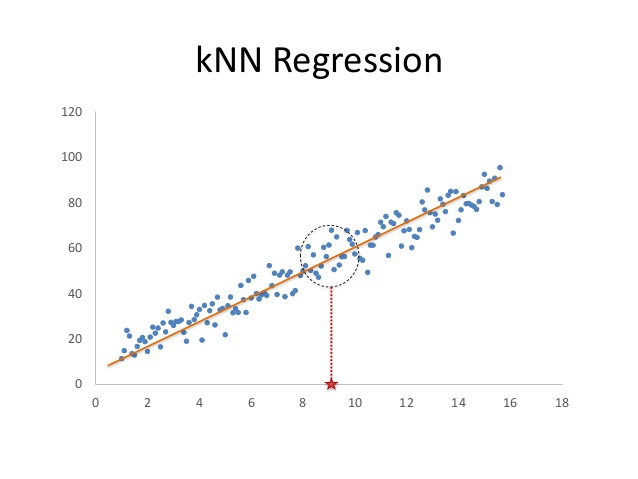

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [97]:
# создадим списки чтобы запоминать историю 
train_MSE =[]  
test_MSE = []

K = 30 # максимальное число соседей
 
 # перебираем значения K в цикле
for k in range(1, K):                         
    # в этой строчке вам необходимо создать классификатор KNeighborsClassifier и указать ему аргумент n_neigbors = k
    KNN = KNeighborsRegressor(n_neighbors=k)
    # в этой строчке вам нужно обучить модель (fit)
    KNN.fit(X_train_scaled, y_train) 
    # в этой строчке вам с помощью обученной модели нужно сделать предсказание (predict) на тестовой части выборки (test)
    y_pred = KNN.predict(X_test_scaled) 
    # в этой строчке вам с помощью обученной модели нужно сделать предсказание (predict) на обучающей части выборки (train)
    y_train_pred = KNN.predict(X_train_scaled) 

    test_MSE.append(mean_squared_error(y_pred ,y_test))
    train_MSE.append(mean_squared_error(y_train_pred ,y_train))


Text(0, 0.5, 'MSE')

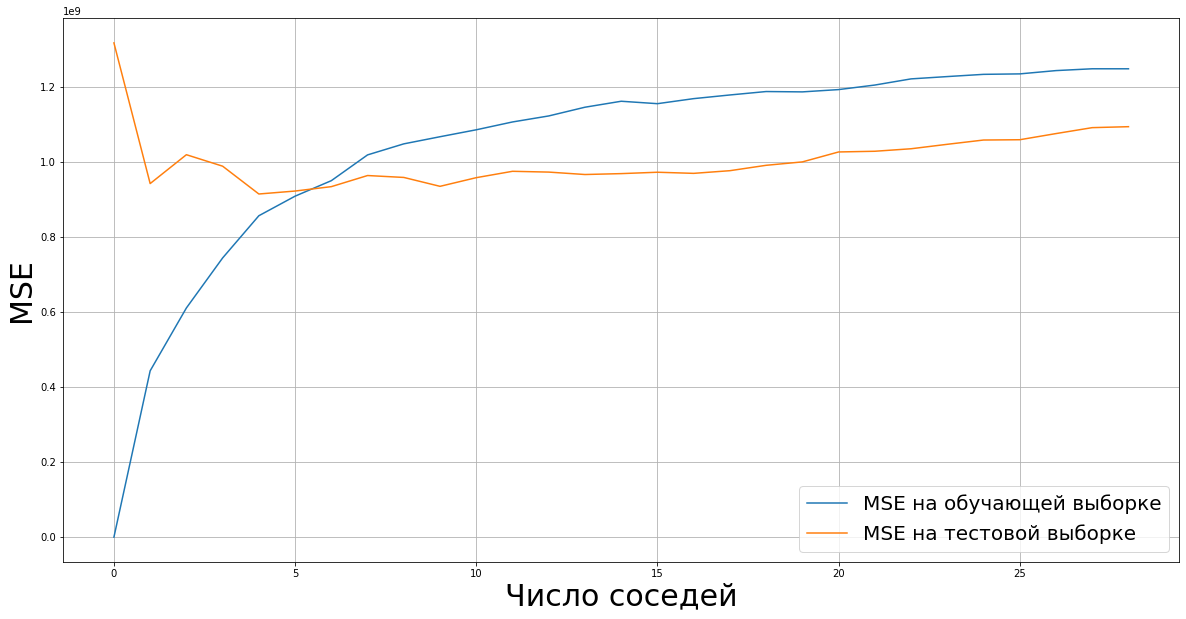

In [136]:
plt.figure(figsize=(20,10))
plt.plot(train_MSE , label = 'MSE на обучающей выборке')
plt.plot(test_MSE ,  label = 'MSE на тестовой выборке' )
plt.legend( fontsize = 20)
plt.grid()
plt.xlabel('Число соседей' , fontsize = 30 )
plt.ylabel('MSE' , fontsize = 30)

# Решающее дерево 

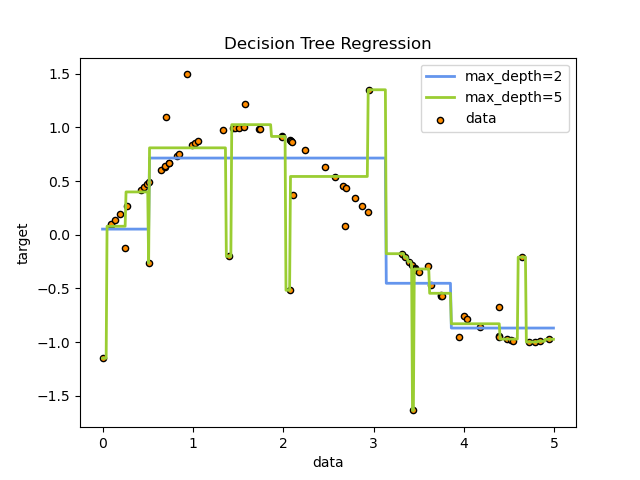

In [132]:
from sklearn import tree
from sklearn.tree  import plot_tree

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_scaled.values[:5,:2], y_train[:5])



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
y_pred = decision_tree.predict(X_test_scaled.values[:5,:2])

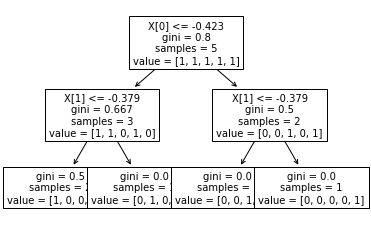

In [134]:
_=plot_tree(decision_tree , fontsize = 10)

In [135]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_scaled.values, y_train)
y_pred = decision_tree.predict(X_test_scaled.values)

In [137]:
mean_squared_error(y_pred ,y_test)

4336996575.880137

# Случайный лес

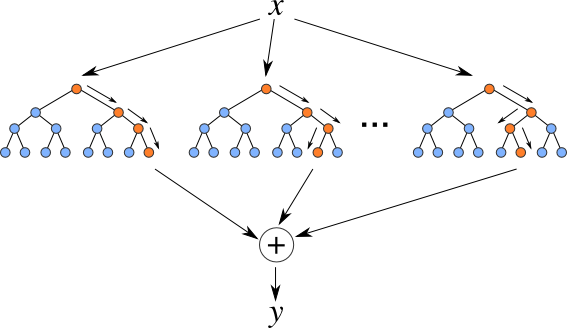

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)

In [140]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [141]:
y_pred = rf.predict(X_test_scaled)

In [143]:
print(np.round(y_pred[:5]))
print(y_test[:5].values)

[199577. 133810. 262456. 130177. 215891.]
[190000 131500 255900  87000 230000]


In [144]:
mean_squared_error(y_pred ,y_test)

823913015.9318603

А теперь попробуйте самостоятельно подобрать гиперпараметры для всех моделей 

## Допглавы предобработки признаков

### Генерация новых признаков

При предобработке датасета часто полезно не только обрабатывать существующие признаки, но и добавлять новые признаки и удалять ненужные. 

Не существует универсального алгоритма, какие признаки нужно удалить, и каким образом сгенерировать новые признаки. То, удалять признак или нет, и как получать новые признаки, зависит от вашего понимания данных. Если вы понимаете, что какой-то признак не несет много смысла и может только запутать модель — удаляйте. А если вам кажется, что новый признак, добавленный в датасет, поможет модели — добавляйте.

Примеры удаления и добавления признаков:

- **пример #1**. Допустим, вы решаете задачу кредитного скоринга: учите модель по информации о человеке понимать, дать человеку кредит или нет. Среди признаков в вашем датасете есть признаки "имя человека" и "количество домашних питомцев". Кажется, что эти признаки можно (и даже лучше) удалить из датасета, потому что они не имеют никакого отношения к тому, насколько вероятно человек вернет кредит. И модели эти признаки принять решение никак не помогут.

- **пример #2**. Допустим, вы решаете задачу предсказания сердечно-сосудистых заболеваний (ССЗ). И в вашем датасете есть признаки "рост" и "вес". Из этих двух признаков можно составить третий — ИМТ (индекс массы тела), который равен $\frac{Вес/2.205}{Рост^2/39.37^2}$. Возможно, с этим признаком в датасете модели будет проще вывести зависимость между параметрами человека и наличием у него ССЗ.

Часто не сразу понятно, будет ли тот или иной признак полезен модели при обучении. Например, сходу до конца неясно, будет ли признак ИМТ действительно полезен модели для предсказания ССЗ. Поэтому нужно ставить эксперименты: обучать и тестировать модель с и без признака, и смотреть, как модель ведет себя лучше. У вас может быть очень много идей разных признаков и очень много экспериментов. И это нормально: вспомните, дата саентист тратить больше 50% своего времени на обработку данных. 

Несмотря на то, что часто мы генерируем признаки, исходя из нашего понимания задачи и природы данных, некоторые автоматические методы генерации признаков все же существуют. 

В библитеке **sklearn** есть модуль preprocessing, в котором собраны методы для предобработки данных, в том числе и для генерации новых признаков. Со всеми методами этого модуля можете познакомиться в документации по ссылке: http://scikit-learn.org/stable/modules/preprocessing.html
А здесь мы рассмотрим один метод генерации новых признаков: класс **PolynomialFeatures**

**PolynomialFeatures** — метод, который принимает на вход **числовые** признаки и генерирует на их основе всевозможные полиномы из этих признаков до определенной степени (степень задается параметром degree). 
Например, если у нас в датасете есть два признака: $x$, $y$, и мы генерируем на их основе полиномиальные признаки до степени 2, то в результате получим 6 признаков: 

1 (колонка из всех единиц), $x$, $y$, $x^2$, $y^2$, $xy$. 

Если степень = 3, то получим уже 10 признаков: 

1, $x$, $y$, $x^2$, $y^2$, $xy$, $x^3$, $y^3$, $x^2y$, $xy^2$.

Давайте посмотрим, как это работает:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) # include_bias=False исключает колонку из всех единиц в полученном результате

Чтобы не плодить очень много признаков, давайте возьмем из нашего датасета два признака и получим из них полиномиальные признаки до степени 3:

In [ ]:
X_train_slice = X_train[['Neighborhood', 'OverallQual']]
X_train_slice.head()

,Neighborhood,OverallQual
828,5,5
542,15,7
109,15,6
648,13,6
658,13,6


In [ ]:
poly.fit(X_train_slice )

PolynomialFeatures(degree=3, include_bias=False)

Полученный результат:

видим, что получили 9 признаков (без колонки из всех единиц)

In [ ]:
pd.DataFrame(poly.transform(X_train_slice)).head()

,0,1,2,3,4,5,6,7,8
0,5.0,5.0,25.0,25.0,25.0,125.0,125.0,125.0,125.0
1,15.0,7.0,225.0,105.0,49.0,3375.0,1575.0,735.0,343.0
2,15.0,6.0,225.0,90.0,36.0,3375.0,1350.0,540.0,216.0
3,13.0,6.0,169.0,78.0,36.0,2197.0,1014.0,468.0,216.0
4,13.0,6.0,169.0,78.0,36.0,2197.0,1014.0,468.0,216.0


После получения полиномиальных признаков их можно добавить к оставшимся признаками датасета и обучать модель. Но в таком виде модель вряд ли обучится хорошо: признаков стало слишком много. Поэтому после генерации полиномиальных признаков прежде чем обучать модель нужно отобрать из них самые удачные, т.е. те, которые дают больше всего пользы для обучения модели. 

Сделать это можно разными способами, но самый простой — обучить на этих признаках какую-нибудь простую модель (например, линейную или логистическую регрессию), посмотреть на важность каждого из полиномиальных признаков для обученной модели и оставить несколько самых важных. И уже на этих оставленных признаках обучать более сложную модель. 